# Attributes- 
### colour- basic colours using color module(blue, white, black, brown, red, green, yellow, grey, orange, pink)
### Sleeve’s format (sleeve)- sleeved, sleeveless, cold shoulders
### Collar format (collar)- collared, collarless
### Pattern of the top (pattern)- plain, logo, checks, stripes, print 
### Neck shape (neck)- round, v neck, square, off shoulders, asymmetric, boat neck
### Length of top (length)- regular, long, high-low
### Type of top (type)- shirt, hoodie, t-shirt, sweatshirt, crop  top, tank top, top


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Capstone/

/content/drive/MyDrive/Capstone


In [ ]:
import json

In [ ]:
def data():
  data_list_attr=[]
  for i in range(1,5):
    f = open(str(i)+"."+"json")
    data = json.load(f)
    for j in data:
      x=j['Label']['classifications']
      res=[]
      res.append(j["External ID"])
      d=dict()
      for i in x:
        try:
          r=[]
          for k in i['answers']:
            r.append(k['value'])
          d[i['title']]=r
        except KeyError:
          d[i['title']]=i['answer']['value']
      res.append(d)
      data_list_attr.append(res)  
  return data_list_attr

In [ ]:
!pip install contractions
!pip install Colour

     |████████████████████████████████| 321 kB 5.7 MB/s 
     |████████████████████████████████| 284 kB 40.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=f123eff25adf0451c559c59930cea9e48652817eaa768ae2201c04cf9277955e
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import re
import contractions
from colour import Color
from PIL import Image

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Extracting colour
def color_extract(color):
    try:
        Color(color)
        return True
    except ValueError:
        return False

In [ ]:
# Extracting type_of_top
def type_of_dress(s):
  type_of_top=[]
  if((" t-shirt" in s) or (" t shirt" in s) or (" tee shirt" in s)):
    print(s)
    type_of_top.append("t-shirt")
  try:
    i=s.index("shirt")-1
    if(i>=0):
      if(("shirt" in s) and (s[i]!="t") and (s[i]!="tee") and (s[i]!="sweat") and ("sweatshirt" not in s) and ("sweat shirt" not in s) and ("t-shirt" not in type_of_top)):
        type_of_top.append("shirt")
  except:
    pass
  if(("hoodie" in s) or ("hoody" in s) or ("hooded" in s)):
    type_of_top.append("hoodie")
  if(("sweatshirt" in s) or ("sweat shirt" in s)):
    type_of_top.append("sweatshirt")
  if(("crop" in s) or ("crop top" in s)):
    type_of_top.append("crop_top")
  if(("tank" in s) or ("tank top" in s)):
    type_of_top.append("tank_top")
  if((len(type_of_top)==0) and ("top" in s)):
    type_of_top.append("top")
  return type_of_top

In [ ]:
#neck_type
def neck_type(s):
  neck=[]
  if("round" in s):
    neck.append("round")
  if(("asymmetric" in s) or ("asymmetry" in s) or ("asymmetrical" in s)):
    neck.append("asymmetric")
  if("square" in s):
    neck.append("square")
  if(("v-neck" in s) or (" v " in s)):
    neck.append("v_neck")
  if(("off shoulders" in s) or ("off" in s)):
    neck.append("off_shoulders")
  if(("boat neck" in s) or ("boatneck" in s) or ("boat" in s)):
    neck.append("boat_neck")
  return neck

In [ ]:
# length type extract
def length_type(s):
  length=[]
  try:
    i=s.index("short")+1
    if("sleeve" not in s[i]):
      if("short" in s):
        type_of_top.append("crop_top")
  except:
    pass
  try:
    i=s.index("small")+1
    if("sleeve" not in s[i]):
      if("small" in s):
        length.append("crop_top")
  except:
    pass
  try:
    i=s.index("regular")+1
    if("sleeve" not in s[i]):
      if(("regular" in s) or ("normal" in s)):
        length.append("regular")
  except:
    pass
  try:
    i=s.index("long")+1
    if("sleeve" not in s[i]):
      if("long" in s):
        length.append("long")
  except:
    pass
  if(("highlow" in s) or ("hilow" in s) or ("hi low" in s) or ("high low" in s)):
    length.append("high-low")
  return length

In [ ]:
# extract pattern type
def pattern_type(s):
  pattern=[]
  if("plain" in s):
    pattern.append("plain")
  if(("logo" in s) or ("sticker" in s)):
    pattern.append("logo")
  if(("checks" in s) or ("checked" in s) or ("check" in s)):
    pattern.append("checks")
  if(("stripes" in s) or ("striped" in s) or ("stripe" in s)):
    pattern.append("stripes")
  if(("print" in s) or ("printed" in s)):
    pattern.append("print")
  return pattern

In [ ]:
def negatives(s):
  negative=["no","none","nothing","neither","nor","never","without"]
  p=s.split()
  for i in range(len(p)):
    if(p[i] in negative):
      p[i]="not"
  s=" ".join(p)
  return s

In [ ]:
#extract collar type
def collar_type(s):
  collar=[]
  tokens=nltk.word_tokenize(s)
  for i in range(len(tokens)):
    if(tokens[i]=="not"):
      x=nltk.pos_tag(tokens[i:])
      for j in x:
        if((j[1]=="NNS") or (j[1]=="NN") or (j[1]=="VBN") or (j[1]=="VBD")):
          if(("collar " in j[0]) or ("collared" in j[0])):
            collar.append("collarless")
          elif(("collarless" in j[0])):
            collar.append("collared")
  if(len(collar)==0):
    if(("collar " in s) or ("collared" in s)):
            collar.append("collared")
    elif(("collarless" in s)):
            collar.append("collarless")
  return collar

In [ ]:
#extract type of sleeves 
def sleeve_type(s):
  sleeve=[]
  tokens=nltk.word_tokenize(s)
  if(("not cold shoulders" in s) or ("not cold" in s)):
    pass
  elif(("cold shoulders" in s) or ("cold" in s)):
    neck.append("coldshoulders")
  for i in range(len(tokens)):
    if(tokens[i]=="not"):
      x=nltk.pos_tag(tokens[i:])
      for j in x:
        if((j[1]=="NNS") or (j[1]=="NN") or (j[1]=="VBN") or (j[1]=="VBD") or (j[1]=="VB")):
          if(("sleeve " in j[0]) or ("sleeve" in j[0]) or ("sleeved" in j[0])  or ("sleeves" in j[0])):
            sleeve.append("sleeveless")
          elif(("sleeveless" in j[0])):
            sleeve.append("sleeved")
  if(len(sleeve)==0):
    if(("sleeve " in s) or ("sleeve" in s[0]) or ("sleeved" in s)  or ("sleeves" in s)):
      sleeve.append("sleeved")
    elif(("sleeveless" in s)):
      sleeve.append("sleeveless")
  return sleeve

In [ ]:
def fun(x):
  return int(x[0].split(".")[0])
def fun2(x):
  return x[2]

In [ ]:
def implementation(s):
  s=contractions.fix(s)
  tokenizer=nltk.RegexpTokenizer(r"\w+")
  s=tokenizer.tokenize(s)
  s=' '.join(s)
  s=re.sub('[^A-Za-z]+', ' ', s)
  s=' '.join(j.lower() for j in s.split() if j.lower())
  s=s.strip()
  color=[i for i in s.split(' ') if color_extract(i)]
  type_of_top = type_of_dress(s)
  neck = neck_type(s)
  length = length_type(s)
  pattern = pattern_type(s)
  s = negatives(s)
  collar = collar_type(s)
  sleeve = sleeve_type(s)
  req=color+sleeve+collar+pattern+neck+length+type_of_top
  data_list_attr = data()
  matched=[]
  q=[]
  filtered=[]
  filtered_2=[]
  filtered_3=[]
  for i in data_list_attr:
    w=[]
    w.append(i[1]['sleeve'])
    w.append(i[1]['collar'])
    w.append(i[1]['neck'])
    w.append(i[1]['length'])
    w.append(i[1]['type'])
    q.append([i[0],w])
    new_req=sleeve+collar+neck+length+type_of_top
    intersection_=[value for value in new_req if value in w]
    filtered.append([i[0],intersection_])
    filtered=sorted(filtered,key=fun)
    try:
      data_color=(i[1]['colour'])
    except:
      data_color=(i[1]['Colour'])
    intersection_2=[value for value in data_color if value in color]
    filtered_2.append([i[0],intersection_2])
    filtered_2=sorted(filtered_2,key=fun)
    data_pattern=(i[1]['pattern'])
    intersection_3=[value for value in data_pattern if value in pattern]
    filtered_3.append([i[0],intersection_3])
    filtered_3=sorted(filtered_3,key=fun)
  for i in data_list_attr:
    w_1=[]
    try:
      w_1.append(i[1]['colour'])
    except:
      w_1.append(i[1]['Colour'])
    w_1.append(i[1]['sleeve'])
    w_1.append(i[1]['collar'])
    w_1.append(i[1]['pattern'])
    w_1.append(i[1]['neck'])
    w_1.append(i[1]['length'])
    w_1.append(i[1]['type'])
    matched.append([i[0],w_1])
  matched=sorted(matched,key=fun)
  for i in range(len(matched)):
    matched[i].append(len(filtered[i][1])+(len(filtered_2[i][1])/10)+(len(filtered_3[i][1])/5))
  matched=sorted(matched,key=fun2,reverse=True)
  return req,matched,filtered,filtered_2,filtered_3


In [ ]:
def outfits(s):
  req,matched,filtered,filtered_2,filtered_3 = implementation(s)
  %cd /content/drive/MyDrive/Capstone/Dataset/
  print("User's requirement",req)
  for i in range(len(matched)):
    if(matched[i][2]>1):
      image = Image.open(matched[i][0])
      image = image.resize((100,100), Image.ANTIALIAS)
      display(image)
      x=matched[i][0]
      num=-1
      for k in range(len(filtered)):
        if(filtered[k][0]==x):
          num=k
      #n=(filtered[num][1])+(filtered_2[num][1])+(filtered_3[num][1])
      #print(n)  
      print("img no:",matched[i][0])

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
%cd /content/

/content


In [ ]:
#ACGPN helps in semantic layout generation(using segmentation), clothes wraping and  inpainting on final image. Generates photo-realistic images.
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 161 (delta 61), reused 84 (delta 17), pack-reused 0
Receiving objects: 100% (161/161), 303.18 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/ACGPN


In [ ]:
#Ninja is required to load C++ extensions which is required at a later stage
!pip install ninja

     |████████████████████████████████| 108 kB 5.4 MB/s 


In [ ]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [ ]:
#creating folders for dataset
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [ ]:
#model for pose analysing
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:01<00:00, 115MB/s]
/content/ACGPN


In [ ]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 769 (delta 14), reused 7 (delta 3), pack-reused 740
Receiving objects: 100% (769/769), 3.81 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (179/179), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 822 (delta 115), reused 172 (delta 103), pack-reused 626
Receiving objects: 100% (822/822), 30.72 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (375/375), done.


In [ ]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:01<00:00, 184MB/s]


'lip_final.pth'

In [ ]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 73.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:01<00:00, 133MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [ ]:
#paths of saved models
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:02<00:00, 188MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


In [ ]:
import shutil

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import measure
import numpy as np
from PIL import Image
from numpy import asarray
import pandas as pd

In [ ]:
def novelty(user_Selected):
  %cd /content/drive/MyDrive/Capstone/Novelty_outfit_generation/
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  img_path = os.path.join('/content/ACGPN/inputs/img', sorted(os.listdir('/content/ACGPN/inputs/img'))[0])
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      roi_image = gray[y:y+h, x:x+w]
  cv2.imwrite("crop.jpg",roi_image)
  for i in range(1,11):
    img = cv2.imread(str(i)+'.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      roi_image = gray[y:y+h, x:x+w]
    cv2.imwrite(str(i)+str(i)+".jpg",roi_image)
  crop = Image.open('crop.jpg')
  crop = crop.resize((50,50))
  c = asarray(crop)
  l=[]
  for i in range(1,11):
    img1 = Image.open(str(i)+str(i)+'.jpg')
    img1 = img1.resize((50,50))
    i1 = asarray(img1)
    l.append([measure.compare_ssim(c, i1,multichannel=True),i])
  l.sort(reverse=True)
  s=0
  for i in range(3):
    df=pd.read_csv("/content/drive/MyDrive/Capstone/Novel_rate/"+str(l[i][1])+".csv")
    s+=df["rating"][int(user_Selected)-1]
    #print(df["rating"][user_Selected-1])
  final_rating=s/3
  return round(final_rating,1)





/content/drive/MyDrive/Capstone
------------WELCOME-------------
Enter Sentence : red color t-shirt
red color t shirt
/content/drive/MyDrive/Capstone/Dataset
User's requirement ['red', 't-shirt']


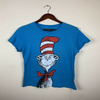

img no: 8.jpg


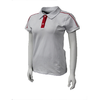

img no: 17.jpg


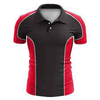

img no: 20.jpg


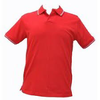

img no: 21.jpg


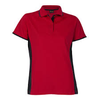

img no: 22.jpg


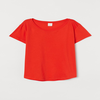

img no: 52.jpg


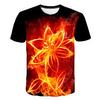

img no: 54.jpg


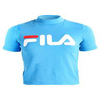

img no: 307.jpg


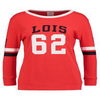

img no: 310.jpg


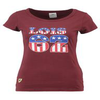

img no: 313.jpg


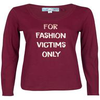

img no: 325.jpg


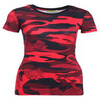

img no: 333.jpg


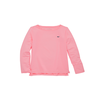

img no: 346.jpg


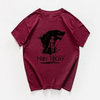

img no: 401.jpg
Enter the selected outfit image number:
333
/content/ACGPN/inputs/img


Saving WhatsApp Image 2021-10-11 at 10.23.48.jpg to WhatsApp Image 2021-10-11 at 10.23.48.jpg
/content/ACGPN/inputs
/content/ACGPN
Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 1/1 [00:00<00:00,  3.26it/s]
File saved at /content/ACGPN/Data_preprocessing/test_pose/000001_0_keypoints.json
?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/

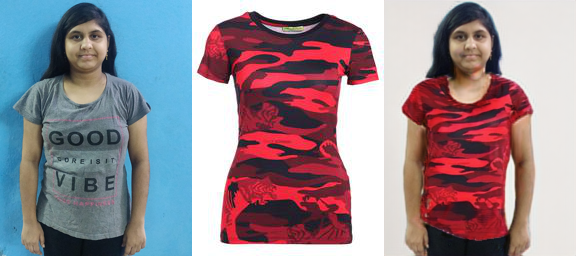

/content/drive/MyDrive/Capstone/Novelty_outfit_generation
Experts gave a rating of 4.0 on a scale of 5 suggesting how good this outfit suits you!!!!


In [ ]:
%cd /content/drive/MyDrive/Capstone/
print("------------WELCOME-------------")
print("")
s = input("Enter Sentence : ")
outfits(s)
print("Enter the selected outfit image number:")
outfit_number = input()

%cd /content/ACGPN/inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

filename="/content/drive/MyDrive/Capstone/Dataset/"+outfit_number+".jpg"
shutil.copy(filename,"/content/ACGPN/inputs/cloth")
#input the outfit image
  
cloth_name = '000001_1.png'
cloth_path = os.path.join('/content/ACGPN/inputs/cloth', sorted(os.listdir('/content/ACGPN/inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('/content/ACGPN/Data_preprocessing/test_color', cloth_name))
u2net_run.infer(u2net, '/content/ACGPN/Data_preprocessing/test_color', 'Data_preprocessing/test_edge')
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('/content/ACGPN/inputs/img', sorted(os.listdir('/content/ACGPN/inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('/content/ACGPN/Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
#print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir '/content/ACGPN/Data_preprocessing/test_img' --output-dir '/content/ACGPN/Data_preprocessing/test_label'
parse_time = time.time()
#print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('/content/ACGPN/Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
#print('Pose map generated in {}s'.format(pose_time-parse_time))

!rm -rf Data_preprocessing/test_pairs.txt
with open('/content/ACGPN/Data_preprocessing/test_pairs.txt','w') as f:
  f.write('000001_0.png 000001_1.png')
!python "/content/ACGPN/test.py"
output_grid = np.concatenate([np.array(Image.open('/content/ACGPN/Data_preprocessing/test_img/000001_0.png')),np.array(Image.open('/content/ACGPN/Data_preprocessing/test_color/000001_1.png')),np.array(Image.open('/content/ACGPN/results/test/try-on/000001_0.png'))], axis=1)
#output_grid = np.array(Image.open('/content/ACGPN/results/test/try-on/000001_0.png'))
image_grid = Image.fromarray(output_grid)
#data = image_grid.fromarray(output_grid)
image_grid.save("/content/drive/MyDrive/Capstone/Test/"+outfit_number+'.png') 
x=cv2.imread("/content/drive/MyDrive/Capstone/Test/"+outfit_number+'.png')
cv2_imshow(x) 
print("Experts gave a rating of " + str(novelty(outfit_number)) + " on a scale of 5 suggesting how good this outfit suits you!!!!")
!rm -rf /content/ACGPN/Data_preprocessing/test_color/*
!rm -rf /content/ACGPN/Data_preprocessing/test_colormask/*
!rm -rf /content/ACGPN/Data_preprocessing/test_edge/*
!rm -rf /content/ACGPN/Data_preprocessing/test_img/*
!rm -rf /content/ACGPN/Data_preprocessing/test_label/*
!rm -rf /content/ACGPN/Data_preprocessing/test_mask/*
!rm -rf /content/ACGPN/Data_preprocessing/test_pose/*
!rm -rf /content/ACGPN/inputs/cloth/*
!rm -rf /content/ACGPN/inputs/img/*!rm -rf Data_preprocessing/test_color/*
!rm -rf /content/ACGPN/Data_preprocessing/test_colormask/*
!rm -rf /content/ACGPN/Data_preprocessing/test_edge/*
!rm -rf /content/ACGPN/Data_preprocessing/test_img/*
!rm -rf /content/ACGPN/Data_preprocessing/test_label/*
!rm -rf /content/ACGPN/Data_preprocessing/test_mask/*
!rm -rf /content/ACGPN/Data_preprocessing/test_pose/*
!rm -rf /content/ACGPN/inputs/cloth/*
!rm -rf /content/ACGPN/inputs/img/*
!rm -rf /content/ACGPN/results/*